In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [36]:
df = pd.read_excel("C:\\Users\\Bijaya\\workspace\\Practice\\Data\\Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')  

In [37]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [38]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [7]:
df.duplicated().sum()

8

In [7]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [9]:
df.describe().T.to_csv('Dump.csv')

In [10]:
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
5,Labour,47,3,4,4,4,4,2,male
6,Labour,57,2,2,4,4,11,2,male
7,Labour,77,3,4,4,1,1,0,male
8,Labour,39,3,3,4,4,11,0,female
9,Labour,70,3,2,5,1,11,2,male


In [21]:
df[df.duplicated(keep=False)]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
2,Labour,35,4,4,5,2,3,2,male
67,Labour,35,4,4,5,2,3,2,male
86,Conservative,53,3,4,2,2,6,0,female
333,Labour,38,2,4,2,2,4,3,male
390,Labour,39,3,4,4,2,5,2,male
577,Conservative,74,4,3,2,4,8,2,female
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
916,Labour,29,4,4,4,2,2,2,female
983,Conservative,74,4,3,2,4,8,2,female


<AxesSubplot:ylabel='age'>

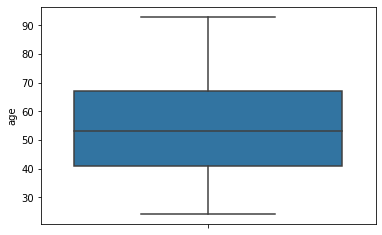

In [11]:
sns.boxplot(y='age',data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

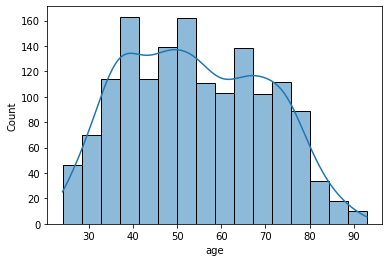

In [12]:
sns.histplot(x='age',data=df,kde=True)

<AxesSubplot:ylabel='economic.cond.national'>

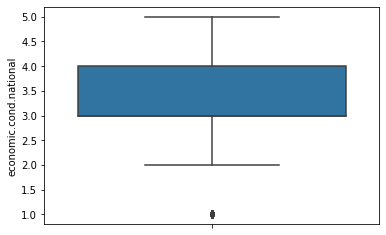

In [15]:
sns.boxplot(y='economic.cond.national',data=df)

In [8]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [14]:
collist=['vote', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
for i in range(len(collist)):
    print(df[collist[i]].value_counts(normalize=True))
    print('---------------------------------')
    

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64
---------------------------------
3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: economic.cond.national, dtype: float64
---------------------------------
3    0.424918
4    0.288525
2    0.183607
5    0.060328
1    0.042623
Name: economic.cond.household, dtype: float64
---------------------------------
4    0.548197
2    0.287213
5    0.100328
1    0.063607
3    0.000656
Name: Blair, dtype: float64
---------------------------------
2    0.409180
4    0.365902
1    0.152787
5    0.047869
3    0.024262
Name: Hague, dtype: float64
---------------------------------
11    0.221639
6     0.137049
3     0.084590
4     0.083279
5     0.081311
8     0.073443
9     0.072787
1     0.071475
10    0.066230
7     0.056393
2     0.051803
Name: Europe, dtype: float64
---------------------------------
2    0.512787
0    0.298361
3    0.163934
1    0.024918
Name: political.knowledge, dtype: float64


In [15]:
collist

['vote',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge',
 'gender']

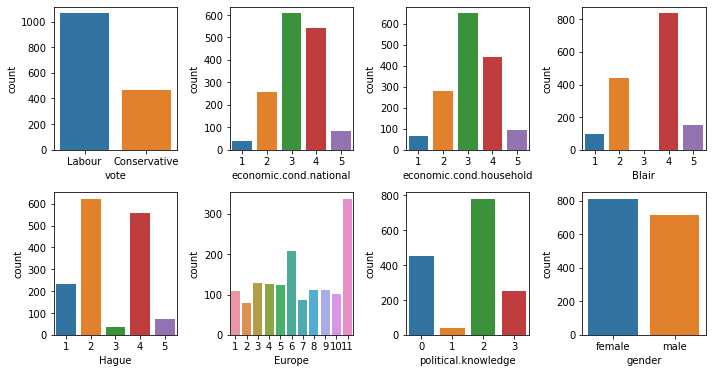

In [10]:
collist=['vote', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
plt.figure(figsize=(10,10))
for i in range(len(collist)):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=df[collist[i]],data=df)
    plt.tight_layout()
    #plt.show()
#for i in range(len(collist)):
    #sns.countplot(x=df[collist[i]],data=df)    

<AxesSubplot:xlabel='economic.cond.national'>

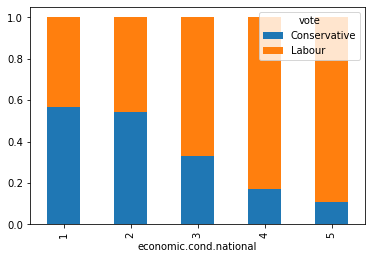

In [24]:
pd.crosstab(df['economic.cond.national'],df['vote'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='economic.cond.household'>

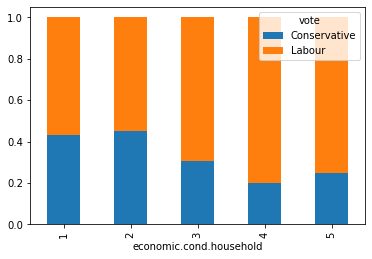

In [25]:
pd.crosstab(df['economic.cond.household'],df['vote'],normalize='index').plot(kind='bar',stacked=True)

In [27]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

<AxesSubplot:xlabel='economic.cond.household'>

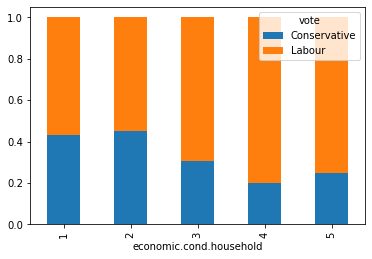

In [28]:
pd.crosstab(df['economic.cond.household'],df['vote'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Blair'>

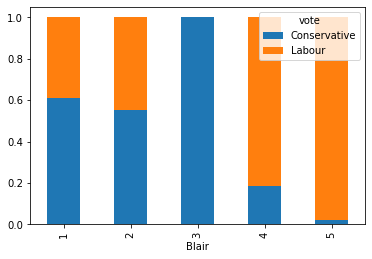

In [29]:
pd.crosstab(df['Blair'],df['vote'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='political.knowledge'>

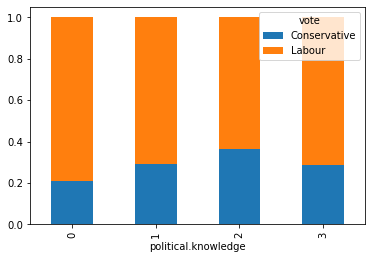

In [17]:
pd.crosstab(df['political.knowledge'],df['vote'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Hague'>

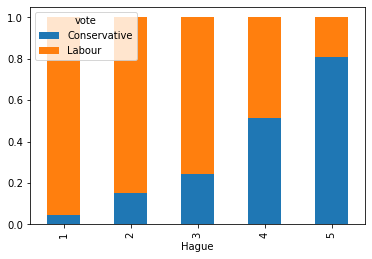

In [18]:
pd.crosstab(df['Hague'],df['vote'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='gender'>

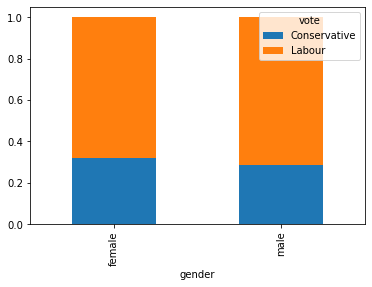

In [19]:
pd.crosstab(df['gender'],df['vote'],normalize='index').plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Europe'>

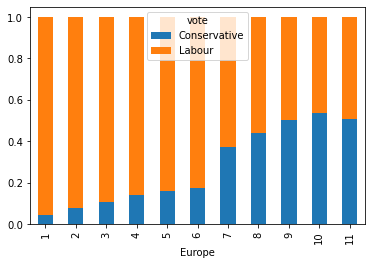

In [22]:
pd.crosstab(df['Europe'],df['vote'],normalize='index').plot(kind='bar',stacked=True)

C:\Users\Bijaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


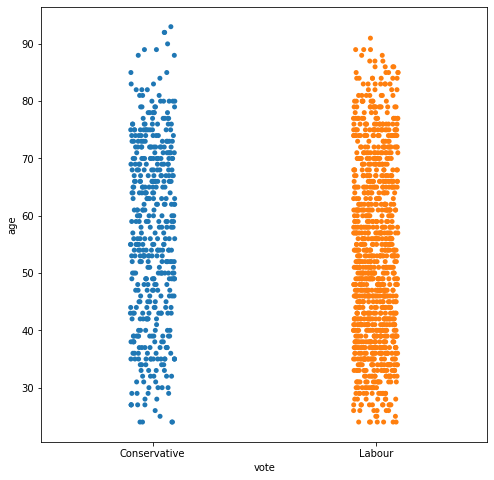

In [19]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['age'],order=['Conservative','Labour'], jitter=True) 
plt.show()

C:\Users\Bijaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


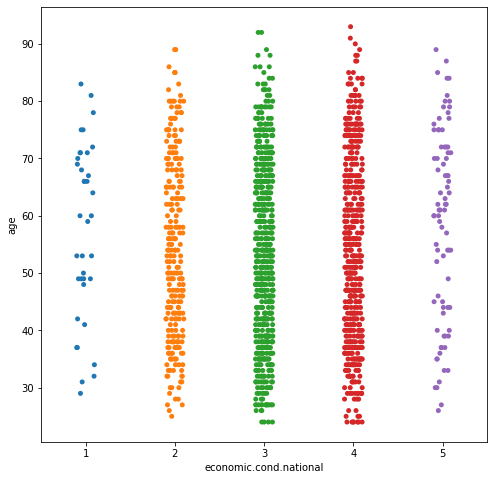

In [18]:
plt.figure(figsize=(8,8))
sns.stripplot(df["economic.cond.national"], df['age'], jitter=True) 
plt.show()

C:\Users\Bijaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


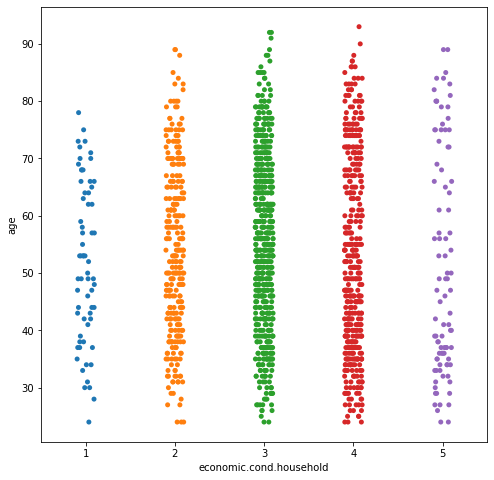

In [19]:
plt.figure(figsize=(8,8))
sns.stripplot(df["economic.cond.household"], df['age'], jitter=True) 
plt.show()

#### Prepare the Data for Splitting

In [46]:
df_model = df.copy()

In [47]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [48]:
df_model =pd.get_dummies(df_model, columns=['vote','gender'],drop_first=True)

In [49]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   vote_Labour              1525 non-null   uint8
 8   gender_male              1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


In [72]:
df_model.head(30)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1
5,47,3,4,4,4,4,2,1
6,57,2,2,4,4,11,2,1
7,77,3,4,4,1,1,0,1
8,39,3,3,4,4,11,0,0
9,70,3,2,5,1,11,2,1


In [11]:
df_model.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [12]:
df_model['vote_Labour'].value_counts(normalize=True)

1    0.697049
0    0.302951
Name: vote_Labour, dtype: float64

In [13]:
df_model['gender_male'].value_counts(normalize=True)

0    0.532459
1    0.467541
Name: gender_male, dtype: float64

In [50]:
X= df_model.drop('vote_Labour',axis=1,inplace= False)
y= df_model.pop('vote_Labour')

In [51]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [52]:
X.shape

(1525, 8)

In [53]:
y.shape

(1525,)

####  Train Test Split 

In [13]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [55]:
print('X_train: ',X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1067, 8)
X_test:  (458, 8)
y_train:  (1067,)
y_test:  (458,)


#### LDA

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [22]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [23]:
## Performance Matrix on train data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# Fit the Logistic Regression model
Log_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Log_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [26]:
## Performance Matrix on train data set
y_train_predict = Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [27]:
## Performance Matrix on train data set
y_test_predict = Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(metric='euclidean', n_neighbors=8)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [29]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416119962511716
[[248  84]
 [ 85 650]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       332
           1       0.89      0.88      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.82      0.82      1067
weighted avg       0.84      0.84      0.84      1067



C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [31]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7925764192139738
[[ 87  43]
 [ 52 276]]
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       130
           1       0.87      0.84      0.85       328

    accuracy                           0.79       458
   macro avg       0.75      0.76      0.75       458
weighted avg       0.80      0.79      0.79       458



C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [34]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [35]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



#### Bagging

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
cart=DecisionTreeClassifier(max_depth=10, min_samples_split=30)
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=101,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=30),
                  n_estimators=101, random_state=1)

In [40]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8631677600749765
[[239  93]
 [ 53 682]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       332
           1       0.88      0.93      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [41]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 82  48]
 [ 35 293]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.76      0.77       458
weighted avg       0.81      0.82      0.82       458



#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfcl = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_split=30,min_samples_leaf=10,random_state=1)
rfcl = rfcl.fit(X_train, y_train)

In [44]:
## Performance Matrix on train data set
y_train_predict = rfcl.predict(X_train)
model_score =rfcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8556701030927835
[[230 102]
 [ 52 683]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       332
           1       0.87      0.93      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.81      0.82      1067
weighted avg       0.85      0.86      0.85      1067



In [45]:
## Performance Matrix on test data set
y_test_predict = rfcl.predict(X_test)
model_score =rfcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 86  44]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.82       458



### Ada Boost

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
cart=DecisionTreeClassifier(max_depth=10, min_samples_split=30)
ADB_model = AdaBoostClassifier(base_estimator=cart, n_estimators=101,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_split=30),
                   n_estimators=101, random_state=1)

In [48]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[332   0]
 [  1 734]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [49]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7969432314410481
[[ 90  40]
 [ 53 275]]
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       130
           1       0.87      0.84      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.77      0.76       458
weighted avg       0.80      0.80      0.80       458



C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [33]:
ADB_model.estimators_

[DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                        random_state=1791095845),
 DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                        random_state=2135392491),
 DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                        random_state=946286476),
 DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                        random_state=1857819720),
 DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=491263),
 DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                        random_state=550290313),
 DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                        random_state=1298508491),
 DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                        random_state=2143362693),
 DecisionTreeClassifier(max_depth=10, min_samples_split=30,
                        random_state=630311759),
 DecisionTreeClassifier(max_depth=10, min

### Gradient Boost

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [51]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [52]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



### Grid Search CV on all MODELS

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.metrics import roc_curve,roc_auc_score

#### Grid Search on KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
param_grid = {
    'metric' :['minkowski','euclidean'],
    'n_neighbors' : [5,8,10,12]
}

KNN_model=KNeighborsClassifier()
grid_search = GridSearchCV(estimator = KNN_model, param_grid = param_grid, cv = 5)

In [20]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: 

{'metric': 'minkowski', 'n_neighbors': 8}


C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: 

KNeighborsClassifier(n_neighbors=8)

In [21]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

------- Train Data------------------
[[248  84]
 [ 85 650]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       332
           1       0.89      0.88      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.82      0.82      1067
weighted avg       0.84      0.84      0.84      1067

------- Test Data------------------
[[ 87  43]
 [ 52 276]]
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       130
           1       0.87      0.84      0.85       328

    accuracy                           0.79       458
   macro avg       0.75      0.76      0.75       458
weighted avg       0.80      0.79      0.79       458



C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train, y_train_predict).ravel()
print(tp)
print(tn)
print(fp)
print(fn)

650
248
84
85


C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


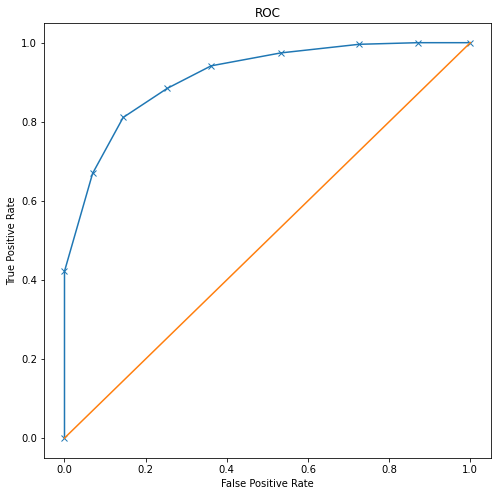

Area under Curve is 0.9125645438898452


C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(8,8))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.savefig('KNN_ROC.png')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


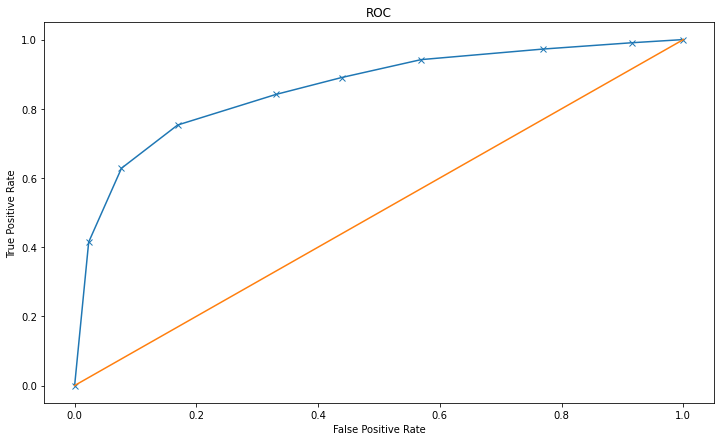

Area under Curve is 0.857610225140713


C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [72]:
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='KNN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [26]:
del y_test_predict
del y_train_predict
del grid_search
del param_grid
del best_grid

#### Grid Search on Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [91]:
Log_model = LogisticRegression()

In [92]:
param_grid = {
    'solver' :['newton-cg','liblinear'],
    'penalty' : ['none','l1'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [10000,1000]
}
Log_model = LogisticRegression(n_jobs=2,random_state=1)
grid_search = GridSearchCV(estimator = Log_model, param_grid = param_grid, cv = 5)

In [93]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs'

{'C': 1.0, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.8322408         nan        nan 0.8322408  0.8322408         nan
        nan 0.8322408  0.8322408         nan        nan 0.83318415
 0.8322408         nan        nan 0.83318415 0.8322408         nan
        nan 0.83412751 0.8322408         nan        nan 0.83412751
 0.8322408         nan        nan 0.81634417 0.8322408         nan
        nan 0.81634417 0.8322408         nan        nan 0.77887763
 0.8322408         nan        nan 0.77887763]
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear')

In [94]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

------- Train Data------------------
[[231 101]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

------- Test Data------------------
[[ 85  45]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [95]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train, y_train_predict).ravel()
print(tp,)
print(tn)
print(fp)
print(fn)

667
231
101
68


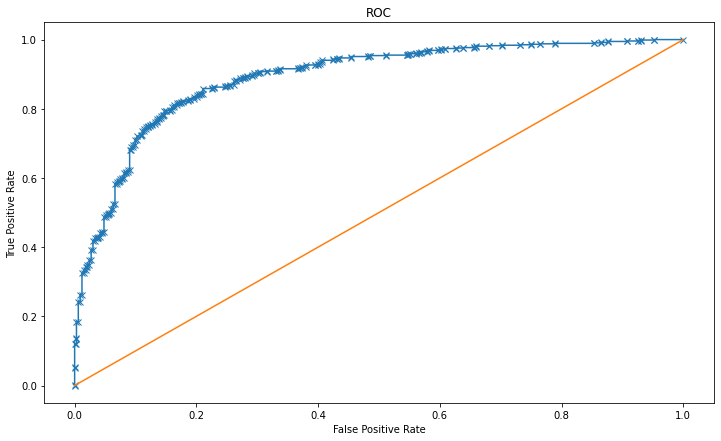

Area under Curve is 0.8897528891074502


In [96]:
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

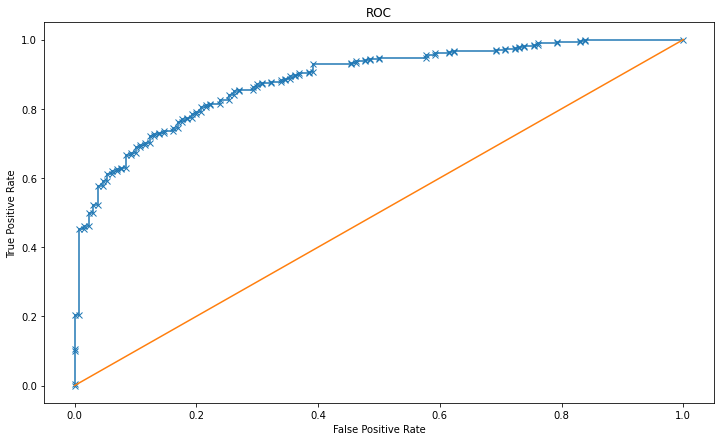

Area under Curve is 0.8836538461538461


In [97]:
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='KNN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [83]:
del y_test_predict
del y_train_predict
del grid_search
del param_grid
del best_grid

In [96]:
del y_train_predict

In [97]:
del best_grid

In [98]:
del param_grid

#### Grid Search on LDA

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [104]:
param_grid = {
    'solver': ['svd','lsqr','eigen'],
    'tol': [0.0001,0.001],   
    'n_components': [None], 
}

LDA_model= LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = LDA_model, param_grid = param_grid, cv = 5)

In [105]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'n_components': None, 'solver': 'svd', 'tol': 0.0001}


LinearDiscriminantAnalysis()

In [106]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

------- Train Data------------------
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067

------- Test Data------------------
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [107]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train, y_train_predict).ravel()
print(tp)
print(tn)
print(fp)
print(fn)

660
233
99
75


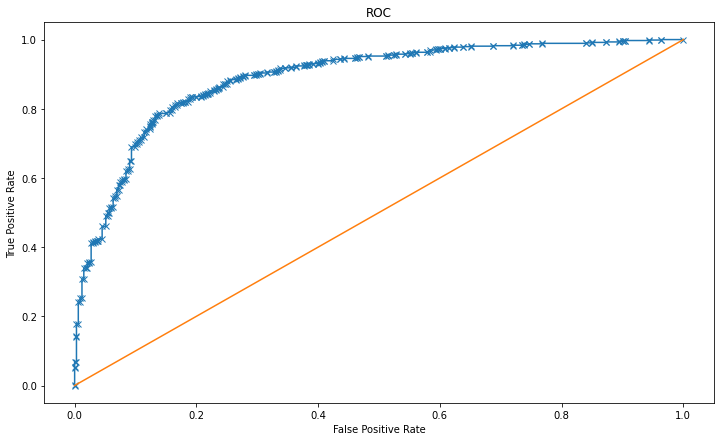

Area under Curve is 0.8892242439144332


In [108]:
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

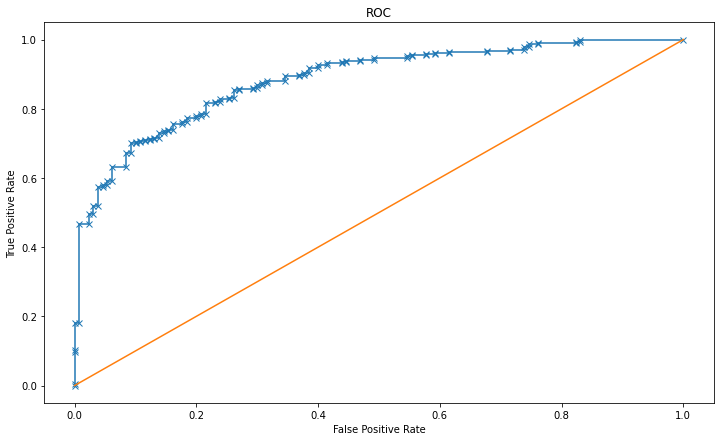

Area under Curve is 0.8837711069418386


In [109]:
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='KNN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [110]:
del y_test_predict
del y_train_predict
del grid_search
del param_grid
del best_grid

In [107]:
del y_train_predict

In [113]:
del grid_search

In [111]:
del best_grid

In [109]:
del param_grid

In [116]:
def clearMem():
    del y_test_predict
    del y_train_predict
    del grid_search
    del best_grid
    del param_grid
    print('Deleted temp variables !')

#### Grid Search on Bagging

In [111]:
param_grid = {
    'base_estimator__criterion': ['gini'],
    'base_estimator__max_depth': [8,10],   # 10-15
    'base_estimator__min_samples_leaf': [5,10,20],   # min_sample_split/3
    'base_estimator__min_samples_split': [20,30,60],   # 2%-3% (preference to cap @100)
    'n_estimators':[100,200],
 #   'base_estimator':['cart'],
}
cart=DecisionTreeClassifier()
Bagging_Grid=BaggingClassifier(base_estimator=cart,random_state=1)

grid_search = GridSearchCV(estimator = Bagging_Grid, param_grid = param_grid, cv = 5)

In [112]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 30, 'n_estimators': 200}


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                        min_samples_leaf=5,
                                                        min_samples_split=30),
                  n_estimators=200, random_state=1)

In [113]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

------- Train Data------------------
[[239  93]
 [ 59 676]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       332
           1       0.88      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067

------- Test Data------------------
[[ 85  45]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.82       458



In [114]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train, y_train_predict).ravel()
print(tp)
print(tn)
print(fp)
print(fn)

676
239
93
59


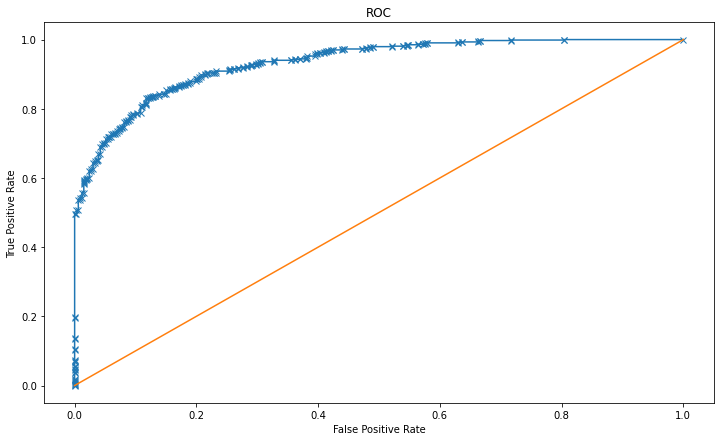

Area under Curve is 0.9323395623309565


In [116]:
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

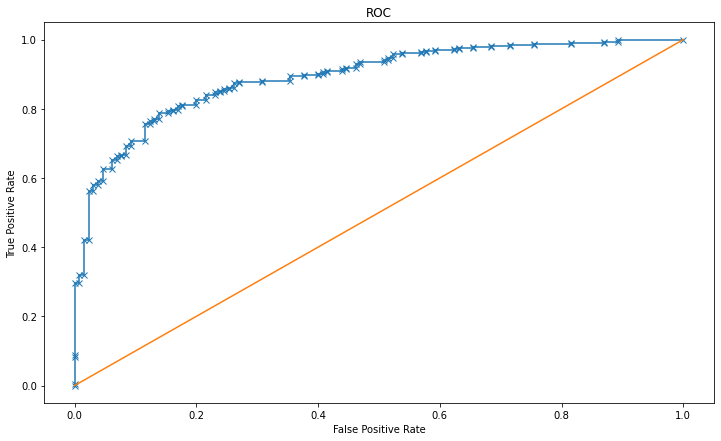

Area under Curve is 0.8920966228893057


In [117]:
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [27]:
del y_test_predict
del y_train_predict
del grid_search
del param_grid
del best_grid

NameError: name 'y_test_predict' is not defined

#### Grid Search on Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [8,10],   # 10-15
    'min_samples_leaf': [5,10,15],   # min_sample_split/3
    'min_samples_split': [20,30,60],   # 2%-3% (preference to cap @100)
    'max_features':[4,6],
    'n_estimators':[100,200],
 #   'base_estimator':['cart'],
}

rf_Grid=RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rf_Grid, param_grid = param_grid, cv = 5)

In [31]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 8, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 200}


RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=200, random_state=1)

In [62]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

------- Train Data------------------
[[240  92]
 [ 60 675]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       332
           1       0.88      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067

------- Test Data------------------
[[ 87  43]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       130
           1       0.87      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [60]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train, y_train_predict).ravel()
print('Predicted +ve', "\t", "Predicted -ve")
print(tp, "\t",fn)
print('------------')
print(fp,"\t", tn)
#print(fn)

Predicted +ve 	 Predicted -ve
675 	 60
------------
92 	 240


In [58]:
print(
    pd.DataFrame(np.round(best_grid.feature_importances_,2),
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                          Imp
Hague                    0.33
Europe                   0.20
Blair                    0.19
political.knowledge      0.12
age                      0.08
economic.cond.national   0.04
economic.cond.household  0.03
gender_male              0.01


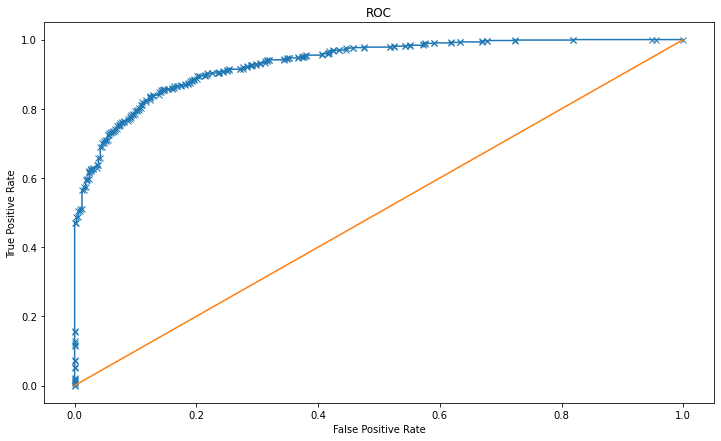

Area under Curve is 0.9325772477665766


In [125]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

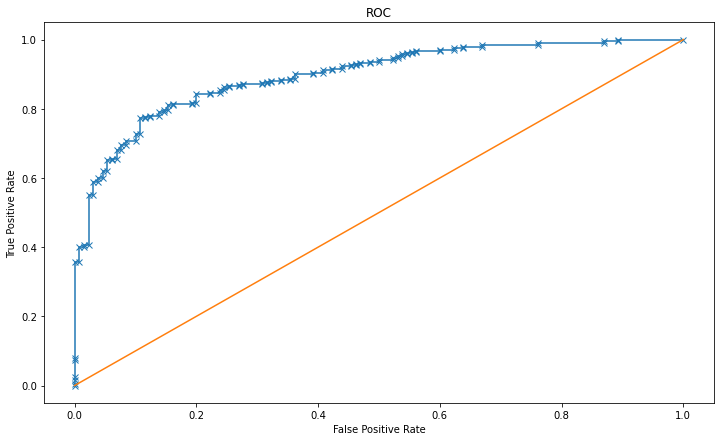

Area under Curve is 0.8962007504690431


In [126]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [127]:
del y_test_predict
del y_train_predict
del grid_search
del param_grid
del best_grid

#### Grid Search on AdaBoost

In [128]:
cart=DecisionTreeClassifier(max_depth=10, min_samples_split=30)
ADB_model = AdaBoostClassifier(base_estimator=cart, n_estimators=101,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_split=30),
                   n_estimators=101, random_state=1)

In [129]:
param_grid = {
    'base_estimator__criterion': ['gini'],
    'base_estimator__max_depth': [8,10,15],   # 10-15
    'base_estimator__min_samples_leaf': [6,10,20],   # min_sample_split/3
    'base_estimator__min_samples_split': [20,30,60],   # 2%-3% (preference to cap @100)
    'n_estimators':[101,200],
 #   'base_estimator':['cart'],
}

ADB_Grid=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=1)

grid_search = GridSearchCV(estimator = ADB_Grid, param_grid = param_grid, cv = 5)

In [130]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarnin

{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 20, 'base_estimator__min_samples_split': 20, 'n_estimators': 200}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_leaf=20,
                                                         min_samples_split=20),
                   n_estimators=200, random_state=1)

In [131]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

------- Train Data------------------
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

------- Test Data------------------
[[ 74  56]
 [ 60 268]]
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       130
           1       0.83      0.82      0.82       328

    accuracy                           0.75       458
   macro avg       0.69      0.69      0.69       458
weighted avg       0.75      0.75      0.75       458



C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


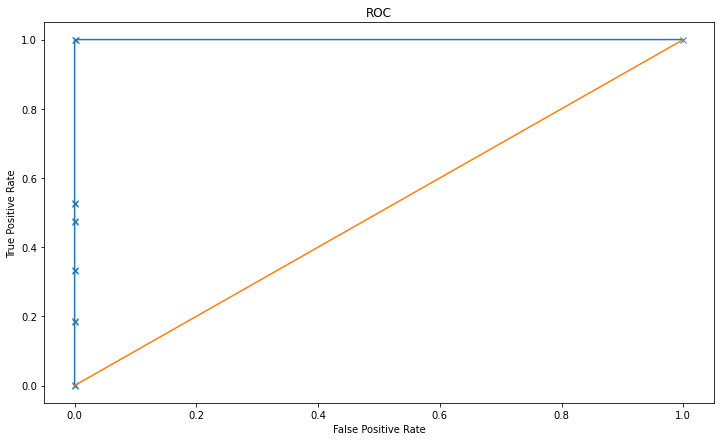

Area under Curve is 0.9999979509876239


C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [133]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


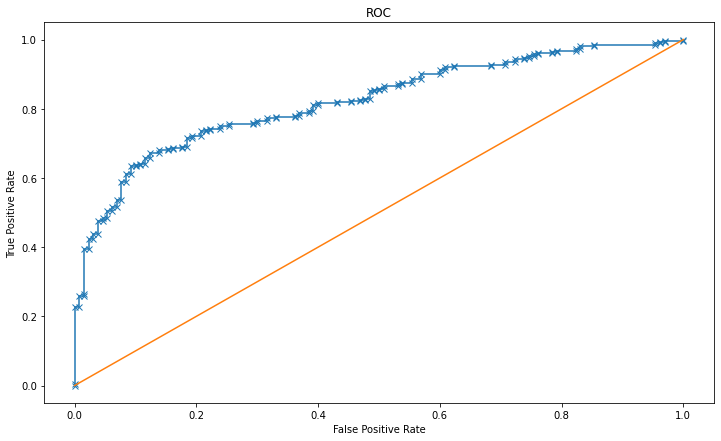

Area under Curve is 0.8223264540337711


C:\Users\Bijaya\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [134]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [135]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train, y_train_predict).ravel()
print(tp)
print(tn)
print(fp)
print(fn)

735
331
1
0


In [136]:
del y_test_predict
del y_train_predict
del grid_search
del param_grid
del best_grid

#### Grid Search on Gradient Boost

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
param_grid = {
    'tol': [0.0001,0.001],
    'max_depth': [8,10,15],   # 10-15
    'min_samples_leaf': [6,10,20],   # min_sample_split/3
    'min_samples_split': [18,30,60],   # 2%-3% (preference to cap @100)
    'n_estimators':[101,200],
    'max_features':[4,6]
 #   'base_estimator':['cart'],
}
gbcl_Grid =GradientBoostingClassifier(random_state=1)
grid_search = GridSearchCV(estimator = gbcl_Grid, param_grid = param_grid, cv = 5)

In [141]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 8, 'max_features': 6, 'min_samples_leaf': 20, 'min_samples_split': 60, 'n_estimators': 101, 'tol': 0.0001}


GradientBoostingClassifier(max_depth=8, max_features=6, min_samples_leaf=20,
                           min_samples_split=60, n_estimators=101,
                           random_state=1)

In [142]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)
print('------- Train Data------------------')
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
print('------- Test Data------------------')
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

------- Train Data------------------
[[298  34]
 [ 22 713]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       332
           1       0.95      0.97      0.96       735

    accuracy                           0.95      1067
   macro avg       0.94      0.93      0.94      1067
weighted avg       0.95      0.95      0.95      1067

------- Test Data------------------
[[ 89  41]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       130
           1       0.87      0.86      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



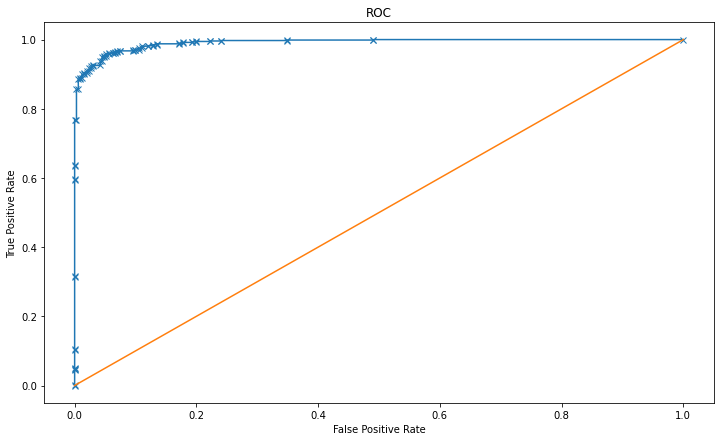

Area under Curve is 0.9913675108597656


In [143]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

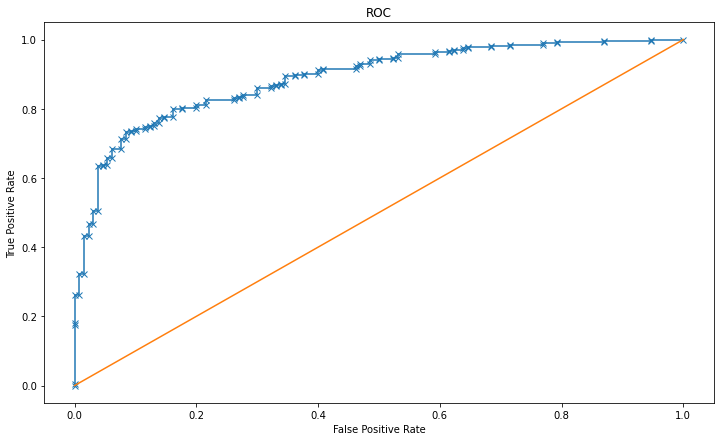

Area under Curve is 0.8888367729831144


In [144]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [145]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train, y_train_predict).ravel()
print(tp)
print(tn)
print(fp)
print(fn)

713
298
34
22


In [61]:
best_grid

RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=200, random_state=1)

In [64]:
y_train_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [66]:
new_df= X_test.copy()

In [67]:
new_df['Prediction']=y_test_predict

In [68]:
new_df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,Prediction
91,49,1,1,2,4,8,3,0,0
1194,34,3,3,2,4,9,2,1,0
201,51,2,2,4,4,4,2,1,1
613,30,2,3,4,4,7,3,1,1
283,42,3,3,2,2,9,0,1,1


<AxesSubplot:xlabel='Blair'>

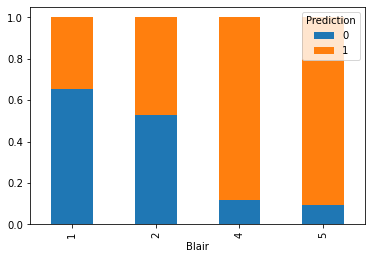

In [70]:
pd.crosstab(new_df['Blair'], new_df['Prediction'], normalize='index').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Hague'>

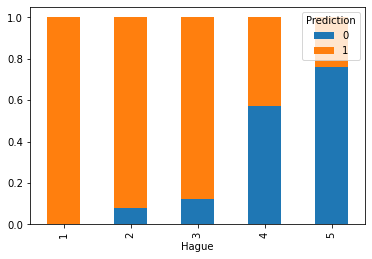

In [74]:
pd.crosstab(new_df['Hague'], new_df['Prediction'], normalize='index').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Europe'>

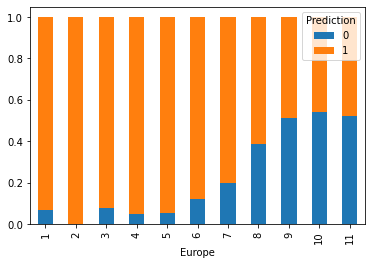

In [75]:
pd.crosstab(new_df['Europe'], new_df['Prediction'], normalize='index').plot(kind='bar', stacked=True)

In [71]:
new_df['Prediction'].value_counts(normalize=True)

1    0.724891
0    0.275109
Name: Prediction, dtype: float64

##  @@@@@@@@@@@@@@@@@  Part II Text Miing @@@@@@@@@@

In [76]:
import nltk  # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string  # this is used for string manipulations
import matplotlib
import seaborn as sns

In [77]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Bijaya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [80]:
roosvlt = inaugural.raw('1941-Roosevelt.txt')

In [82]:
kndy= inaugural.raw('1961-Kennedy.txt')

In [83]:
nxn= inaugural.raw('1973-Nixon.txt')

In [89]:
lisst = [roosvlt,kndy,nxn]
speech_df=pd.DataFrame(lisst,columns=['Speech'], index=['Roosevelt','Kennedy','Nixon'])
speech_df

,Speech
Roosevelt,On each national day of inauguration since 178...
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [90]:
## Converting all the words to lower case

speech_df["Speech"] = speech_df["Speech"].apply(
    lambda x: " ".join(x.lower() for x in x.split())
)
speech_df

,Speech
Roosevelt,on each national day of inauguration since 178...
Kennedy,"vice president johnson, mr. speaker, mr. chief..."
Nixon,"mr. vice president, mr. speaker, mr. chief jus..."


In [112]:
speech_df["char_count"] = speech_df["Speech"].str.len()
speech_df[["Speech", "char_count"]]

,Speech,char_count
Roosevelt,on each national day of inauguration since 178...,7533
Kennedy,"vice president johnson, mr. speaker, mr. chief...",7591
Nixon,"mr. vice president, mr. speaker, mr. chief jus...",9940


In [131]:
kndy_wc= list(inaugural.words('1961-Kennedy.txt'))
rosvlt_wc= list(inaugural.words('1941-Roosevelt.txt'))
nixn= list(inaugural.words('1973-Nixon.txt'))

In [109]:
speech_df["totalwords"] = [len(x.split()) for x in speech_df["Speech"].tolist()]
speech_df[["Speech", "totalwords"]]

,Speech,totalwords
Roosevelt,on each national day of inauguration since 178...,1360
Kennedy,"vice president johnson, mr. speaker, mr. chief...",1390
Nixon,"mr. vice president, mr. speaker, mr. chief jus...",1819


In [114]:
len(inaugural.words('1973-Nixon.txt'))

2028

In [117]:
pd.DataFrame(list(inaugural.sents('1941-Roosevelt.txt')))

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,On,each,national,day,of,inauguration,since,1789,",",the,...,None,None,None,None,None,None,None,None,None,None
1,In,Washington,',s,day,the,task,of,the,people,...,None,None,None,None,None,None,None,None,None,None
2,In,Lincoln,',s,day,the,task,of,the,people,...,None,None,None,None,None,None,None,None,None,None
3,In,this,day,the,task,of,the,people,is,to,...,None,None,None,None,None,None,None,None,None,None
4,To,us,there,has,come,a,time,",",in,the,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,In,the,face,of,great,perils,never,before,encountered,",",...,None,None,None,None,None,None,None,None,None,None
64,For,this,we,muster,the,spirit,of,America,",",and,...,None,None,None,None,None,None,None,None,None,None
65,We,do,not,retreat,.,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
66,We,are,not,content,to,stand,still,.,None,None,...,None,None,None,None,None,None,None,None,None,None


In [160]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words("english")
speech_df["Speech"] = speech_df["Speech"].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop)
)
speech_df["Speech"].head()

In [118]:
from nltk.corpus import stopwords

In [119]:
stop = stopwords.words("english")

In [139]:
for i in stop:
    if i in kndy_wc:
        while i in kndy_wc:
            kndy_wc.remove(i) 

In [141]:
len(kndy_wc)

913

In [142]:
for i in stop:
    if i in rosvlt_wc:
        while i in rosvlt_wc:
            rosvlt_wc.remove(i) 

In [143]:
len(rosvlt_wc)

880

In [144]:
for i in stop:
    if i in nixn:
        while i in nixn:
            nixn.remove(i) 

In [145]:
len(nixn)

1103

In [148]:
rosvlt_wc = rosvlt_wc.str.replace("[^\w\s]", "")

AttributeError: 'list' object has no attribute 'str'

In [150]:
speech_df["Speech"] = speech_df["Speech"].str.replace("[^\w\s]", "")

In [181]:
stop.append('us')
stop.append('let')

In [189]:
stop = stopwords.words("english")
stop.append('us')
stop.append('let')
speech_df["Speech"] = speech_df["Speech"].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop)
)
speech_df["Speech"].head()

Roosevelt    national day inauguration since 1789 people re...
Kennedy      vice president johnson mr speaker mr chief jus...
Nixon        mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [183]:
speech_df

,Speech,totalwords,char_count,totalwords_StpRmvd
Roosevelt,national day inauguration since 1789 people re...,1360,7533,627
Kennedy,vice president johnson mr speaker mr chief jus...,1390,7591,693
Nixon,mr vice president mr speaker mr chief justice ...,1819,9940,833


In [190]:
speech_df["totalwords_StpRmvd"] = [len(x.split()) for x in speech_df["Speech"].tolist()]
speech_df[["Speech", "totalwords_StpRmvd"]]

,Speech,totalwords_StpRmvd
Roosevelt,national day inauguration since 1789 people re...,618
Kennedy,vice president johnson mr speaker mr chief jus...,665
Nixon,mr vice president mr speaker mr chief justice ...,785


In [161]:
speech_df['Speech']['Nixon']

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations

In [208]:
pd.Series("".join(speech_df["Speech"]['Nixon']).split()).value_counts()[:10]

peace             19
world             16
new               15
america           13
responsibility    11
government        10
great              9
home               9
abroad             8
nation             8
dtype: int64

In [195]:
pd.Series("".join(speech_df["Speech"]['Roosevelt']).split()).value_counts()[:10]

nation       11
know         10
spirit        9
democracy     9
life          8
america       7
people        7
freedom       6
years         6
mind          5
dtype: int64

In [196]:
pd.Series("".join(speech_df["Speech"]['Kennedy']).split()).value_counts()[:10]

world       8
sides       8
pledge      7
new         7
power       5
ask         5
free        5
nations     5
shall       5
citizens    5
dtype: int64

In [ ]:
freq = pd.Series(" ".join(Apple_tweets["Tweet"]).split()).value_counts()[:10]
freq

In [205]:
wc_a = "".join(speech_df["Speech"]['Nixon'])
wc_a

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question shall use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role ma

In [ ]:
from wordcloud import WordCloud


Word Cloud !!


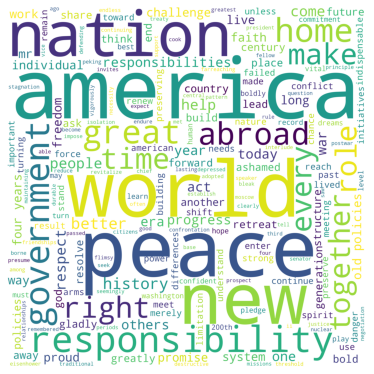

<Figure size 432x288 with 0 Axes>

In [206]:

wordcloud = WordCloud(
    width=3000,
    height=3000,
    background_color="white",
    min_font_size=10,
    random_state=100,
).generate(wc_a)

# plot the WordCloud image
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud")
plt.tight_layout(pad=0)

print("Word Cloud !!")
plt.show()
plt.savefig('WordCloud_Rvlt.jpg')